In [1]:
import pandas as pd
import numpy as np
from Apriori import apriori, get_candidate,L_flatten,get_rule,rule_generation

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm

### Running Apriori on IBM datasets

#### Generating frequent itemsets

In [2]:
IBM_item=[]
ibm=pd.DataFrame({'transaction_id':[],'item_id':[]})
with open('./IBM-Quest-Data-Generator.exe/output.csv','r') as f:
    for line in f.readlines():
        IBM_item.append(line.strip().split()[2])
        ibm=ibm.append({'transaction_id':line.strip().split()[1],'item_id':line.strip().split()[2]},ignore_index=True)

ti_=ibm.groupby(ibm.transaction_id)
IBM_transDB=[]
for i in ti_:
    IBM_transDB.append(list(i[1]['item_id']))

In [3]:
kg=pd.read_csv('./supermarket/GroceryStoreDataSet.csv',header=None,names=['trans'])

KG_transDB=[]
for line in kg.trans:
    KG_transDB.append(line.split(','))
KG_item=[]
for i in KG_transDB:
    KG_item.extend(i)

In [4]:
import time
minsup=[0.02,0.05,0.1,0.2]
IBM_Lk=[]
IBM_Lsup=[]
IBM_number_candidate=[]
IBM_size_candidate=[]
IBM_number_frequent=[]
IBM_size_frequent=[]
for s in minsup:
    print('====min support:{}===='.format(s))
    t=time.time()
    lk,lsup,nc,kc,nl,kl=apriori(IBM_item,IBM_transDB,s)
    print('time:',time.time()-t)
    IBM_Lk.append(lk)
    IBM_Lsup.append(lsup)
    IBM_number_candidate.append(nc)
    IBM_size_candidate.append(kc)
    IBM_number_frequent.append(nl)
    IBM_size_frequent.append(kl)

====min support:0.02====
Size of set of large itemsets L(1): 38
len: 147
Size of set of large itemsets L(2): 147
len: 168
Size of set of large itemsets L(3): 168
len: 142
Size of set of large itemsets L(4): 142
len: 78
Size of set of large itemsets L(5): 78
len: 25
Size of set of large itemsets L(6): 25
len: 4
Size of set of large itemsets L(7): 4
len: 0
time: 0.3239476680755615
====min support:0.05====
Size of set of large itemsets L(1): 30
len: 54
Size of set of large itemsets L(2): 54
len: 50
Size of set of large itemsets L(3): 50
len: 27
Size of set of large itemsets L(4): 27
len: 8
Size of set of large itemsets L(5): 8
len: 1
Size of set of large itemsets L(6): 1
len: 0
time: 0.1126561164855957
====min support:0.1====
Size of set of large itemsets L(1): 22
len: 31
Size of set of large itemsets L(2): 31
len: 34
Size of set of large itemsets L(3): 34
len: 21
Size of set of large itemsets L(4): 21
len: 7
Size of set of large itemsets L(5): 7
len: 1
Size of set of large itemsets L(6):

In [5]:
IBM_item_set=list(set(IBM_item))
IBM_C1=[]
IBM_C1_c=[]
for i in range(len(IBM_item_set)):
    IBM_C1.append(IBM_item_set[i])
    IBM_C1_c.append(IBM_item.count(IBM_item_set[i]))

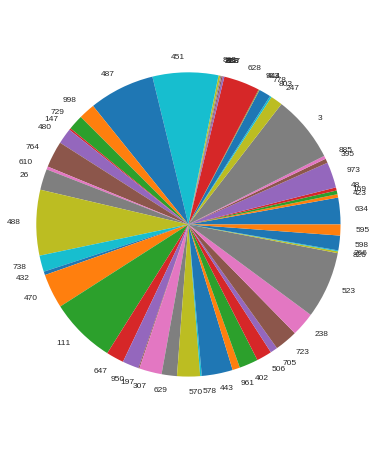

In [6]:
plt.style.use('seaborn-white')
plt.figure(figsize=(6,8))
texts,autotexts =plt.pie(IBM_C1_c,labels=IBM_C1)
plt.axis('equal')
#fontsize
proptease = fm.FontProperties()
proptease.set_size('small')
plt.setp(autotexts, fontproperties=proptease)
plt.show()

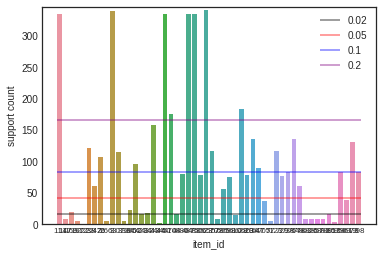

In [7]:
IBM_time={'support':[0.02,0.05,0.1,0.2],
          'time':[0.4011220932006836,0.0973916053771972,0.05980801582336426,0.030231475830078125]}

sns.barplot()
#plt.figure(figsize=(15,4))
plt.ylim(0,max(IBM_C1_c)+5)
ax=sns.barplot(x=IBM_C1,y=IBM_C1_c)
h_c=['black','red','blue','purple']
for i in range(len(IBM_time['support'])):
    plt.hlines(y=IBM_time['support'][i]*len(IBM_transDB),xmin=-0.5,
               xmax=len(IBM_C1_c)-0.5,colors=h_c[i],alpha=0.5,
              label=IBM_time['support'][i])
plt.legend()
plt.xticks(fontsize=8)
plt.xlabel('item_id')
plt.ylabel('support count')
plt.show()

Text(0, 0.5, 'running time')

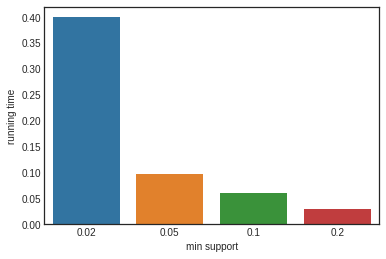

In [8]:
sns.barplot()
plt.ylim(0,0.42)
sns.barplot(x='support',y='time',data=IBM_time)
plt.xlabel('min support')
plt.ylabel('running time')

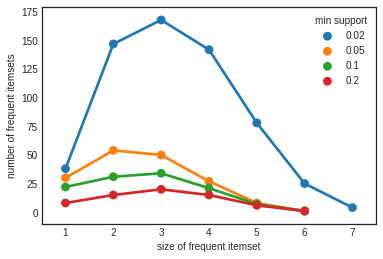

In [9]:
IBM_minsup=[]
for sup in range(len(IBM_size_frequent)):
    IBM_minsup.extend([IBM_time['support'][sup]]*len(IBM_size_frequent[sup]))

IBM_k=[]
IBM_num=[]
IBM_k,IBM_num=L_flatten(IBM_size_frequent,IBM_number_frequent)

IBM_L=pd.DataFrame({'k':IBM_k,'num':IBM_num,'min support':IBM_minsup})

sns.pointplot(x="k", y="num", hue="min support", data=IBM_L)
plt.xlabel('size of frequent itemset')
plt.ylabel('number of frequent itemsets')
plt.show()

#### Generating rules

In [10]:
import time
minsup=[0.4]
Lk=[]
Lsup=[]
for s in minsup:
    t=time.time()
    lk,lsup,nc,kc,nl,kl=apriori(IBM_item,IBM_transDB,s)
    Lk.append(lk)
    Lsup.append(lsup)
    print(s,time.time()-t)

Size of set of large itemsets L(1): 6
len: 1
Size of set of large itemsets L(2): 1
len: 0
0.4 0.023236751556396484


In [11]:
ri=rule_generation(Lk,Lsup,0.9)

rule: ['523'] -> ['3']  confidence: 0.9765395894428153
rule: ['3'] -> ['523']  confidence: 0.9794117647058823


#### Running Apriori on kaggle datasets

In [12]:
import time
minsup=[0.05,0.1,0.2]
KG_Lk=[]
KG_Lsup=[]
KG_number_candidate=[]
KG_size_candidate=[]
KG_number_frequent=[]
KG_size_frequent=[]
for s in minsup:
    print('====min support:{}===='.format(s))
    t=time.time()
    lk,lsup,nc,kc,nl,kl=apriori(KG_item,KG_transDB,s)
    print('time:',time.time()-t)
    KG_Lk.append(lk)
    KG_Lsup.append(lsup)
    KG_number_candidate.append(nc)
    KG_size_candidate.append(kc)
    KG_number_frequent.append(nl)
    KG_size_frequent.append(kl)

====min support:0.05====
Size of set of large itemsets L(1): 11
len: 36
Size of set of large itemsets L(2): 36
len: 30
Size of set of large itemsets L(3): 30
len: 6
Size of set of large itemsets L(4): 6
len: 0
time: 0.010278940200805664
====min support:0.1====
Size of set of large itemsets L(1): 11
len: 24
Size of set of large itemsets L(2): 24
len: 10
Size of set of large itemsets L(3): 10
len: 1
Size of set of large itemsets L(4): 1
len: 0
time: 0.0077817440032958984
====min support:0.2====
Size of set of large itemsets L(1): 9
len: 7
Size of set of large itemsets L(2): 7
len: 0
time: 0.0005998611450195312


In [13]:
KG_item_set=list(set(KG_item))
KG_C1=[]
KG_C1_c=[]
for i in range(len(KG_item_set)):
    KG_C1.append(KG_item_set[i])
    KG_C1_c.append(KG_item.count(KG_item_set[i]))

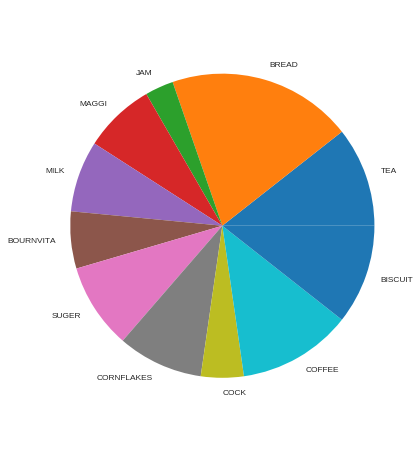

In [14]:
plt.style.use('seaborn-white')
plt.figure(figsize=(6,8))
texts,autotexts =plt.pie(KG_C1_c,labels=KG_C1)
plt.axis('equal')
# fontsize
proptease = fm.FontProperties()
proptease.set_size('small')
plt.setp(autotexts, fontproperties=proptease)
plt.show()

Text(0, 0.5, 'running time')

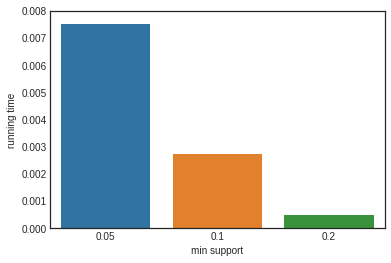

In [15]:
KG_time={'support':['0.05','0.1','0.2'],
          'Atime':[0.007523298263549805,0.002736330032348633,0.0004901885986328125],
        'Ftime': [0.002671480178833008, 0.001405477523803711, 0.0006449222564697266]}

sns.barplot()
plt.ylim(0,0.008)
sns.barplot(x='support',y='Atime',data=KG_time)
plt.xlabel('min support')
plt.ylabel('running time')

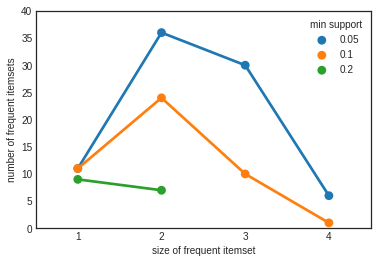

In [16]:
KG_minsup=[]
for sup in range(len(KG_size_frequent)):
    KG_minsup.extend([KG_time['support'][sup]]*len(KG_size_frequent[sup]))

KG_k,KG_num=L_flatten(KG_size_frequent,KG_number_frequent)
KG_L=pd.DataFrame({'k':KG_k,'num':KG_num,'min support':KG_minsup})

sns.pointplot(x="k", y="num", hue="min support", data=KG_L)
plt.ylim(0,40)
plt.xlabel('size of frequent itemset')
plt.ylabel('number of frequent itemsets')
plt.show()

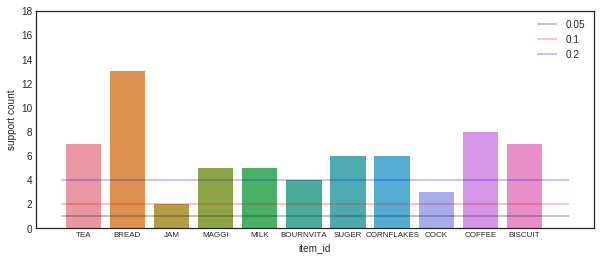

In [17]:
support=[0.05,0.1,0.2]
#sns.barplot()
plt.figure(figsize=(10,4))
plt.ylim(0,max(KG_C1_c)+5)
ax=sns.barplot(x=KG_C1,y=KG_C1_c)
h_c=['black','red','blue']
for i in range(len(support)):
    plt.hlines(y=support[i]*len(KG_transDB),xmin=-0.5,
               xmax=len(KG_C1),colors=h_c[i],alpha=0.3,
              label=support[i])
plt.legend()
plt.xticks(fontsize=8)
plt.xlabel('item_id')
plt.ylabel('support count')
plt.show()

In [18]:
KG_time

{'support': ['0.05', '0.1', '0.2'],
 'Atime': [0.007523298263549805, 0.002736330032348633, 0.0004901885986328125],
 'Ftime': [0.002671480178833008, 0.001405477523803711, 0.0006449222564697266]}

In [19]:
KG_C1_c

[7, 13, 2, 5, 5, 4, 6, 6, 3, 8, 7]

#### Generating rules

In [20]:
minsup=[0.1]
Lkk=[]
Lsupk=[]

for s in minsup:
    t=time.time()
    lk,lsup,nc,kc,nl,kl=apriori(KG_item,KG_transDB,s)
    Lkk.append(lk)
    Lsupk.append(lsup)
    print(s,time.time()-t)

Size of set of large itemsets L(1): 11
len: 24
Size of set of large itemsets L(2): 24
len: 10
Size of set of large itemsets L(3): 10
len: 1
Size of set of large itemsets L(4): 1
len: 0
0.1 0.00627899169921875


In [21]:
kr=rule_generation(Lkk,Lsupk,0.9)

rule: ['COCK', 'COFFEE', 'CORNFLAKES'] -> ['BISCUIT']  confidence: 1.0
rule: ['COCK', 'CORNFLAKES'] -> ['BISCUIT', 'COFFEE']  confidence: 1.0
rule: ['BISCUIT', 'COFFEE', 'CORNFLAKES'] -> ['COCK']  confidence: 1.0
rule: ['BISCUIT', 'COFFEE'] -> ['COCK', 'CORNFLAKES']  confidence: 1.0
rule: ['BISCUIT', 'COCK', 'CORNFLAKES'] -> ['COFFEE']  confidence: 1.0
rule: ['BISCUIT', 'COCK'] -> ['COFFEE', 'CORNFLAKES']  confidence: 1.0
rule: ['BISCUIT', 'COCK', 'COFFEE'] -> ['CORNFLAKES']  confidence: 1.0
rule: ['BOURNVITA', 'TEA'] -> ['BREAD']  confidence: 1.0
rule: ['BISCUIT', 'TEA'] -> ['MAGGI']  confidence: 1.0
rule: ['BISCUIT', 'MAGGI'] -> ['TEA']  confidence: 1.0
rule: ['JAM', 'MAGGI'] -> ['BREAD']  confidence: 1.0
rule: ['JAM'] -> ['BREAD', 'MAGGI']  confidence: 1.0
rule: ['BREAD', 'JAM'] -> ['MAGGI']  confidence: 1.0
rule: ['BISCUIT', 'MILK'] -> ['BREAD']  confidence: 1.0
rule: ['COCK', 'CORNFLAKES'] -> ['COFFEE']  confidence: 1.0
rule: ['COCK', 'CORNFLAKES'] -> ['BISCUIT']  confidence: 1.0


#### comparison running time of Apriori and FP-growth

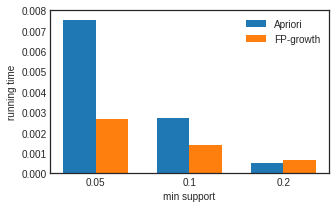

In [22]:
plt.figure(figsize=(5,3))
plt.ylim(0,0.008)
plt.bar(KG_time['support'],KG_time['Atime'],
        label='Apriori',align='edge',width=-0.35)
plt.xlabel('min support')
plt.ylabel('running time')
plt.bar(x='support',height='Ftime',
        label='FP-growth',data=KG_time,align='edge',width=0.35)
plt.legend()